# Amazon Business Research Analyst Hiring Challenge: Round 1

### Gender Neutrality and Inclusion
#### Problem
Companies are expected to be equal opportunity employers. Their recruitment and selection process is
expected to provide equal opportunity irrespective of gender identity or expression, religion, color,
sex, age, physical or mental disability, sexual orientation, or any
other basis covered by local law. Removal of bias and providing equal opportunity to all applicants
promotes access to the widest pool of talent.
XyX corporation recruits employees for fixed Job Codes every year. Basis the applications received last
year for each job code profile, a ‘fitment %’ percentage was determined based on selections made. XyX followed a fair and equitable approach by personally
looking at all parameters and determining the right fit. This year the number of applicants has
multiplied and they are looking at an ML model to predict the ‘fitment %’ for the applications received


#### Task
Build a model that calculates the ‘fitment %’ & detects the factor that influences relevancy and making sure that factor does not introduce inequality and/or bias in the’ fitment
%’ by appropriate feature reengineering. Submit a presentation explaining how your model’s predictions will be used by business leaders to analyse and enable an equal-opportunity and
bias-free recruitment process.


The Code is structured as follows:

1. EDA
2. Feature Engineering
3. Feature Selection
4. Update BiasInfluentialFactor field to handle bias
5. Model Training
6. Model Testing


## Import Libraries

In [1]:
# Import Necessary Libraries

#!pip install pyod

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
import statsmodels.api as sm
from scipy.stats.mstats import zscore
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from pandas import Series
from matplotlib import pyplot

from category_encoders import TargetEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from hyperopt import fmin, tpe, hp, anneal, Trials
import lightgbm as lgb
import itertools
import math
import random
import xgboost as xgb
import tensorflow
import keras
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder


C:\Users\ibaruah001\AppData\Local\Annaconda\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## EDA

In [2]:
# Input the dataset
df1 = pd.read_csv('Train.csv')

df1.head(5)

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [3]:
#Check number of rows and columns, type of each columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13645 entries, 0 to 13644
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmpID                    13645 non-null  int64  
 1   EmpName                  13645 non-null  object 
 2   LanguageOfCommunication  13645 non-null  object 
 3   Age                      13645 non-null  int64  
 4   Gender                   13645 non-null  object 
 5   JobProfileIDApplyingFor  13645 non-null  object 
 6   HighestDegree            13645 non-null  object 
 7   DegreeBranch             13645 non-null  object 
 8   GraduatingInstitute      13645 non-null  object 
 9   LatestDegreeCGPA         13645 non-null  int64  
 10  YearsOfExperince         13645 non-null  int64  
 11  GraduationYear           13645 non-null  int64  
 12  CurrentCTC               13645 non-null  int64  
 13  ExpectedCTC              13645 non-null  int64  
 14  MartialStatus         

In [3]:
# Ensure Correct Column Types

String_cols = ['EmpID', 'EmpName', 'LanguageOfCommunication', 'Gender',
               'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
               'GraduatingInstitute',  'MartialStatus',
               'CurrentDesignation', 'CurrentCompanyType',
               'DepartmentInCompany', 'BiasInfluentialFactor']

Numeric_cols = ['Age', 'YearsOfExperince',
               'GraduationYear', 'CurrentCTC', 'ExpectedCTC',
               'EmpScore', 'TotalLeavesTaken','FitmentPercent']



df1[String_cols] = df1[String_cols].astype(str)
df1[Numeric_cols] = df1[Numeric_cols].apply(pd.to_numeric, errors='coerce')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13645 entries, 0 to 13644
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmpID                    13645 non-null  object 
 1   EmpName                  13645 non-null  object 
 2   LanguageOfCommunication  13645 non-null  object 
 3   Age                      13645 non-null  int64  
 4   Gender                   13645 non-null  object 
 5   JobProfileIDApplyingFor  13645 non-null  object 
 6   HighestDegree            13645 non-null  object 
 7   DegreeBranch             13645 non-null  object 
 8   GraduatingInstitute      13645 non-null  object 
 9   LatestDegreeCGPA         13645 non-null  int64  
 10  YearsOfExperince         13645 non-null  int64  
 11  GraduationYear           13645 non-null  int64  
 12  CurrentCTC               13645 non-null  int64  
 13  ExpectedCTC              13645 non-null  int64  
 14  MartialStatus         

In [9]:
# Understanding the numeric fields
df1.describe()

,Age,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,FitmentPercent
count,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000
mean,30.691242,7.100257,6.547746,2014.452254,18.076951,25.061488,3.392085,11.967021,75.880093
std,3.881378,1.346539,3.426920,3.426920,7.208130,7.478119,1.044676,4.897836,14.894207
min,24.000000,4.000000,1.000000,2009.000000,6.000000,10.000000,1.000000,4.000000,33.530000
25%,28.000000,6.000000,4.000000,2012.000000,12.000000,19.000000,3.000000,8.000000,68.720000
50%,31.000000,7.000000,7.000000,2014.000000,18.000000,25.000000,3.000000,12.000000,78.110000
75%,34.000000,8.000000,9.000000,2017.000000,24.000000,31.000000,4.000000,16.000000,87.990000
max,42.000000,10.000000,12.000000,2020.000000,30.000000,40.000000,5.000000,20.000000,95.500000


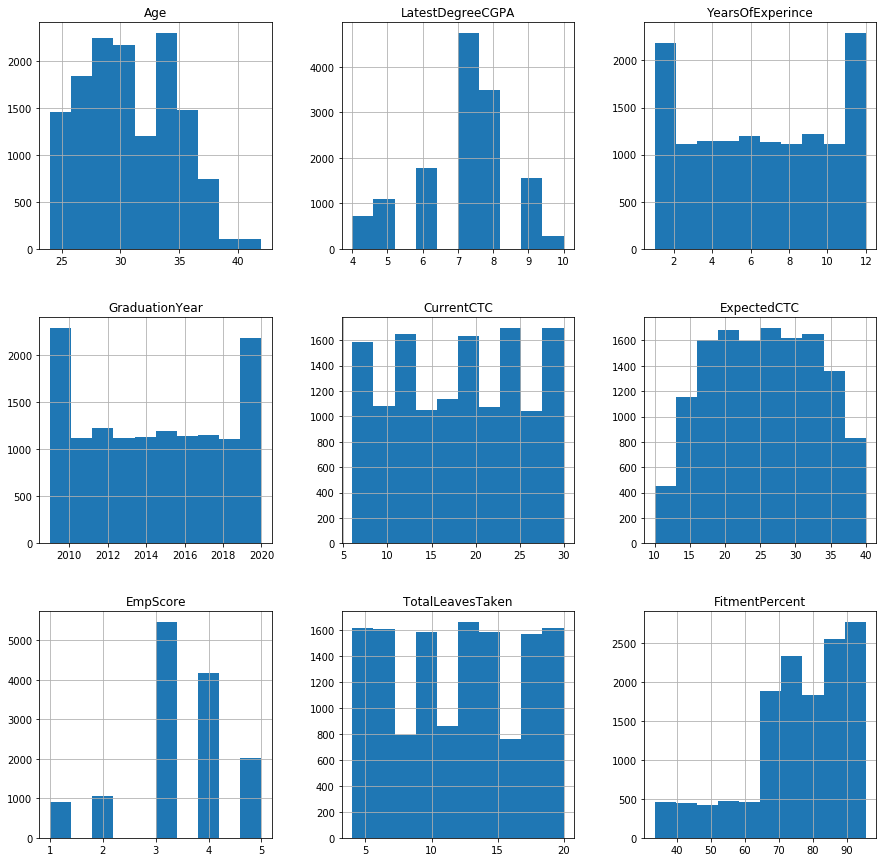

In [10]:
# Histogram of all numeric fields
df1.hist(figsize=(15,15));

In [23]:
# Checking Average values of some of the categorical variables

# JobProfileIDApplyingFor

df1.groupby(['JobProfileIDApplyingFor'])['FitmentPercent','CurrentCTC','ExpectedCTC',].mean()

C:\Users\ibaruah001\AppData\Local\Annaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,FitmentPercent,CurrentCTC,ExpectedCTC
JobProfileIDApplyingFor,,,
JR70175,75.935455,18.165289,25.235537
JR79193,76.979749,18.250737,25.231563
JR81165,75.348855,18.127753,25.162996
JR85289,75.646108,18.081967,25.003832
JR87525,75.877453,17.987705,25.031616
JR88654,75.257857,18.380952,25.366667
JR88873,76.679581,18.343722,25.352627
JR88879,76.217409,17.727864,24.695370
JR89890,75.585480,18.171997,25.184097


In [24]:
# Checking Average values of some of the categorical variables

# DegreeBranch

df1.groupby(['DegreeBranch'])['FitmentPercent','CurrentCTC','ExpectedCTC',].mean()

C:\Users\ibaruah001\AppData\Local\Annaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,FitmentPercent,CurrentCTC,ExpectedCTC
DegreeBranch,,,
Artificial Intelligence,75.712249,18.039480,24.962519
Computer Science,76.104620,18.088019,25.106549
Electrical,75.713683,18.115363,25.016639
Electrical and Electronics,76.462175,18.435000,25.250000
Electronics,75.522331,18.193055,25.216598
Information Technology,75.861590,17.947544,24.969930


## Feature Engineering

In [4]:
# Ordinal Encoding for string variables with logical order

# HighestDegree

# create a list of our conditions
conditions = [
    (df1['HighestDegree'] == "B.Tech") | (df1['HighestDegree'] == "BCA") ,
    (df1['HighestDegree'] == "M.Tech") | (df1['HighestDegree'] == "MCA") | (df1['HighestDegree'] == "MS"),
    (df1['HighestDegree'] == "Dual M.Tech") | (df1['HighestDegree'] == "Dual MBA") | (df1['HighestDegree'] == "PhD"),
    ]

# create a list of the values we want to assign for each condition
values = [1,2,3]

# create a new column and use np.select to assign values to it using our lists as arguments
df1['HighestDegree_Ordinal'] = np.select(conditions, values)


# GraduatingInstitute

# create a list of our conditions
conditions = [
    (df1['GraduatingInstitute'] == "Tier 3"),
    (df1['GraduatingInstitute'] == "Tier 2"),
    (df1['GraduatingInstitute'] == "Tier 1")]

# create a list of the values we want to assign for each condition
values = [1,2,3]

# create a new column and use np.select to assign values to it using our lists as arguments
df1['GraduatingInstitute_Ordinal'] = np.select(conditions, values)





In [5]:
# One Hot Encoding

# CurrentCompanyType has only 3 types of values

# Get one hot encoding 
one_hot = pd.get_dummies(df1['CurrentCompanyType'])

# Join the encoded df
df2 = df1.join(one_hot)
print(len(df1))
print(len(df2))

# DepartmentInCompany has only 5 types of values

# Get one hot encoding 
one_hot2 = pd.get_dummies(df1['DepartmentInCompany'])

# Join the encoded df
df3 = df2.join(one_hot2)
print(len(df3))

# DepartmentInCompany has only 5 types of values

# Get one hot encoding 
one_hot3 = pd.get_dummies(df1['DegreeBranch'])

# Join the encoded df
df4 = df3.join(one_hot3)
print(len(df4))

df4.head()

13645
13645
13645
13645


,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,Design,Engineering,Finance,Product,Artificial Intelligence,Computer Science,Electrical,Electrical and Electronics,Electronics,Information Technology
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,1,0,0,0,0,0,1,0,0,0
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,0,1,0,0,1,0,0,0,0,0
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,0,1,0,0,0,1,0,0,0,0
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,0,0,0,1,0,0,0,0,0,1
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,0,1,0,0,0,1,0,0,0,0


In [6]:
# Current Year - Graduation Year

df4['Current_less_Grad_Year'] = 2021 - df4['GraduationYear']
df4.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,Engineering,Finance,Product,Artificial Intelligence,Computer Science,Electrical,Electrical and Electronics,Electronics,Information Technology,Current_less_Grad_Year
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,0,0,0,0,0,1,0,0,0,12
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,1,0,0,1,0,0,0,0,0,3
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,1,0,0,0,1,0,0,0,0,6
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,0,0,1,0,0,0,0,0,1,6
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,1,0,0,0,1,0,0,0,0,2


In [7]:
# Target Encoding

df4['Job_Title_DegreeBrach_CurrentDesignation'] = df4['JobProfileIDApplyingFor']+df4['CurrentDesignation'] + df4['DepartmentInCompany'] 
encoder = TargetEncoder()
df4['Job_Title_DegreeBrach_CurrentDesignation_Currect_CTC_Encoded'] = encoder.fit_transform(df4['Job_Title_DegreeBrach_CurrentDesignation'], df4['CurrentCTC'])
df4['Job_Title_DegreeBrach_CurrentDesignation_Expected_CTC_Encoded'] = encoder.fit_transform(df4['Job_Title_DegreeBrach_CurrentDesignation'], df4['ExpectedCTC'])
df4['Job_Title_DegreeBrach_CurrentDesignation_Y_Encoded'] = encoder.fit_transform(df4['Job_Title_DegreeBrach_CurrentDesignation'], df4['FitmentPercent'])

df4.head()


C:\Users\ibaruah001\AppData\Roaming\Python\Python37\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\ibaruah001\AppData\Roaming\Python\Python37\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\ibaruah001\AppData\Roaming\Python\Python37\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,Computer Science,Electrical,Electrical and Electronics,Electronics,Information Technology,Current_less_Grad_Year,Job_Title_DegreeBrach_CurrentDesignation,Job_Title_DegreeBrach_CurrentDesignation_Currect_CTC_Encoded,Job_Title_DegreeBrach_CurrentDesignation_Expected_CTC_Encoded,Job_Title_DegreeBrach_CurrentDesignation_Y_Encoded
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,0,1,0,0,0,12,JR85289SSEDesign,17.840000,24.613333,76.326833
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,0,0,0,0,0,3,JR87525BAEngineering,18.379679,25.465241,75.582888
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,1,0,0,0,0,6,JR87525SDEEngineering,17.802065,24.869191,75.790534
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,0,0,0,0,1,6,JR87525SDEProduct,18.264957,25.307692,76.877094
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,1,0,0,0,0,2,JR70175SDEEngineering,18.130435,25.152174,76.341739


## Feature Selection

In [9]:
df4.columns

Index(['EmpID', 'EmpName', 'LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken', 'BiasInfluentialFactor',
       'FitmentPercent', 'HighestDegree_Ordinal',
       'GraduatingInstitute_Ordinal', 'Enterprise', 'MidSized', 'Startup',
       'Customer Success', 'Design', 'Engineering', 'Finance', 'Product',
       'Artificial Intelligence', 'Computer Science', 'Electrical',
       'Electrical and Electronics', 'Electronics', 'Information Technology',
       'Current_less_Grad_Year', 'Job_Title_DegreeBrach_CurrentDesignation',
       'Job_Title_DegreeBrach_CurrentDesignation_Currect_CTC_Encoded',
       'Job_Title_DegreeBrach_CurrentDesignation_Expected_CTC_Encoded',
       'Job_Title_

In [8]:
predictors = df4[['LatestDegreeCGPA', 'YearsOfExperince','CurrentCTC', 'ExpectedCTC', 
                   'EmpScore','TotalLeavesTaken', 'HighestDegree_Ordinal',
                   'GraduatingInstitute_Ordinal', 'Enterprise', 'MidSized', 'Startup',
                   'Customer Success', 'Design', 'Engineering', 'Finance', 'Product',
                   'Artificial Intelligence', 'Computer Science', 'Electrical',
                   'Electrical and Electronics', 'Electronics', 'Information Technology',
                   'Current_less_Grad_Year',
                   'Job_Title_DegreeBrach_CurrentDesignation_Currect_CTC_Encoded',
                   'Job_Title_DegreeBrach_CurrentDesignation_Expected_CTC_Encoded',
                   'Job_Title_DegreeBrach_CurrentDesignation_Y_Encoded']]
Target = df4['FitmentPercent'] 

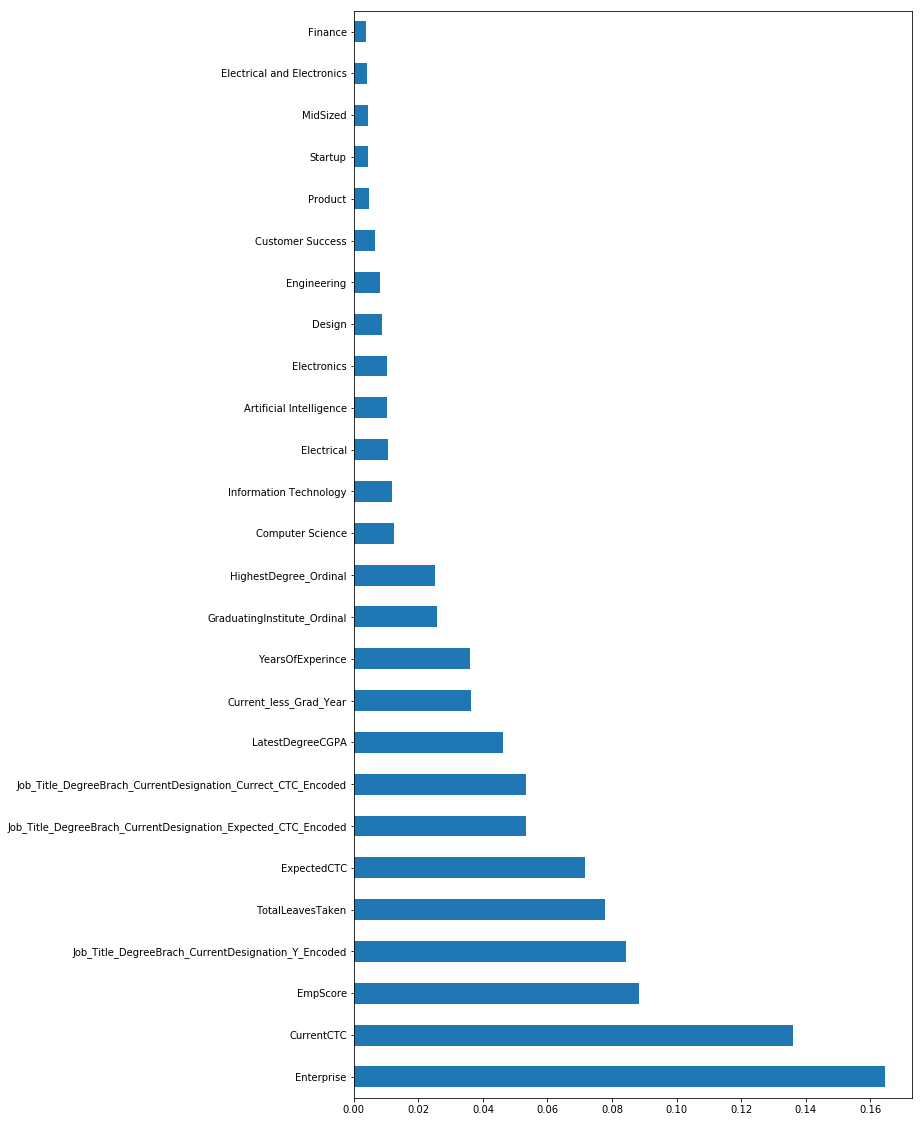

In [50]:
# 1.Select the top n features based on feature importance from random forest

np.random.seed(10)
plt.rcParams["figure.figsize"] = (10,20)
# define the model
model = RandomForestRegressor(random_state = random.seed(10))
# fit the model
model.fit(predictors, Target)

# get importance
features = predictors
importances = model.feature_importances_
indices = np.argsort(importances)

feat_importances = pd.Series(model.feature_importances_, index=predictors.columns)
feat_importances.nlargest(30).plot(kind='barh')



In [51]:
#Final Features from Random Forest (Select Features with highest feature importance)
rf_top_features = pd.DataFrame(feat_importances.nlargest(13)).axes[0].tolist()
rf_top_features

['Enterprise',
 'CurrentCTC',
 'EmpScore',
 'Job_Title_DegreeBrach_CurrentDesignation_Y_Encoded',
 'TotalLeavesTaken',
 'ExpectedCTC',
 'Job_Title_DegreeBrach_CurrentDesignation_Expected_CTC_Encoded',
 'Job_Title_DegreeBrach_CurrentDesignation_Currect_CTC_Encoded',
 'LatestDegreeCGPA',
 'Current_less_Grad_Year',
 'YearsOfExperince',
 'GraduatingInstitute_Ordinal',
 'HighestDegree_Ordinal']

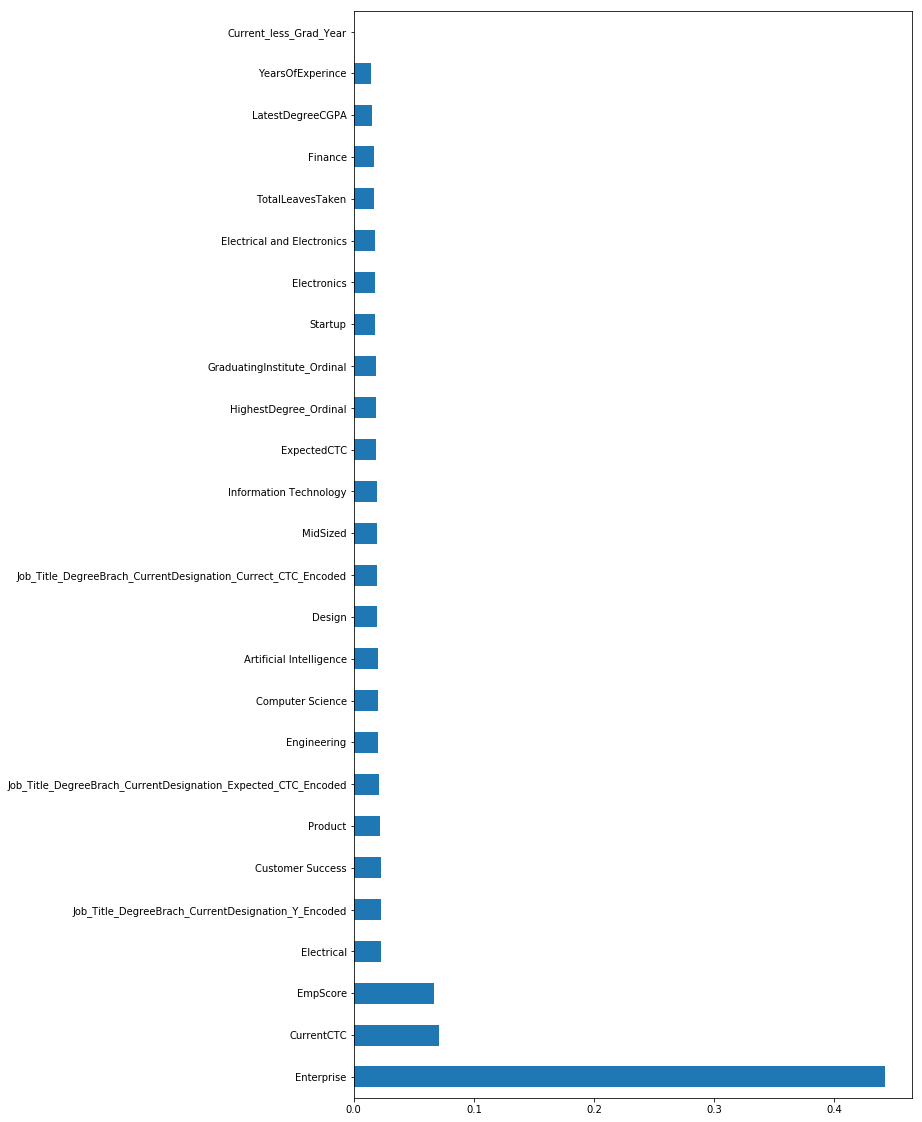

In [55]:
# 2.1 Select the top n features based on feature importance from XG Boost

np.random.seed(10)

# define the model
model = xgb.XGBRegressor(random_state=42)
# fit the model
model.fit(predictors, Target)

# get importance
features = predictors
importances = model.feature_importances_
indices = np.argsort(importances)

feat_importances = pd.Series(model.feature_importances_, index=predictors.columns)
feat_importances.nlargest(30).plot(kind='barh')



In [52]:
#### As top drivers are same as random forest, not considering this method

In [46]:
#3.Select the features identified by Lasso regression

np.random.seed(10)

estimator = LassoCV(cv=5, normalize = True)

sfm = SelectFromModel(estimator, prefit=False, norm_order=1, max_features=None)

sfm.fit(predictors, Target)

feature_idx = sfm.get_support()
Lasso_features = predictors.columns[feature_idx].tolist()
Lasso_features

['LatestDegreeCGPA',
 'YearsOfExperince',
 'CurrentCTC',
 'EmpScore',
 'HighestDegree_Ordinal',
 'Enterprise',
 'MidSized',
 'Finance',
 'Computer Science',
 'Electronics',
 'Current_less_Grad_Year',
 'Job_Title_DegreeBrach_CurrentDesignation_Currect_CTC_Encoded',
 'Job_Title_DegreeBrach_CurrentDesignation_Y_Encoded']

In [54]:
# Combining the features from random forest and lasso regression
combined_feature_list =  Lasso_features + rf_top_features
combined_feature_list = list(set(combined_feature_list))
combined_feature_list

['Current_less_Grad_Year',
 'Electronics',
 'Job_Title_DegreeBrach_CurrentDesignation_Currect_CTC_Encoded',
 'Job_Title_DegreeBrach_CurrentDesignation_Y_Encoded',
 'EmpScore',
 'Enterprise',
 'LatestDegreeCGPA',
 'MidSized',
 'TotalLeavesTaken',
 'Finance',
 'GraduatingInstitute_Ordinal',
 'YearsOfExperince',
 'Job_Title_DegreeBrach_CurrentDesignation_Expected_CTC_Encoded',
 'CurrentCTC',
 'Computer Science',
 'ExpectedCTC',
 'HighestDegree_Ordinal']

In [9]:
predictors2 = df4[['Current_less_Grad_Year',
                     'Electronics',
                     'Job_Title_DegreeBrach_CurrentDesignation_Currect_CTC_Encoded',
                     'Job_Title_DegreeBrach_CurrentDesignation_Y_Encoded',
                     'EmpScore',
                     'Enterprise',
                     'LatestDegreeCGPA',
                     'MidSized',
                     'TotalLeavesTaken',
                     'Finance',
                     'GraduatingInstitute_Ordinal',
                     'YearsOfExperince',
                     'Job_Title_DegreeBrach_CurrentDesignation_Expected_CTC_Encoded',
                     'CurrentCTC',
                     'Computer Science',
                     'ExpectedCTC',
                     'HighestDegree_Ordinal']]

## Train and Test Model for predicting 'FitmentPercent'

In [25]:
# Base Model 1: Default XG Boost with all Features

# define model
model_xgb_d1 = xgb.XGBRegressor(random_state=42)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate model
scores = cross_val_score(model_xgb_d1, predictors, Target, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 10.258 (0.223)


In [47]:
# Base Model 2: Default XG Boost with selected Features

# define model
model_xgb_d2 = xgb.XGBRegressor(random_state=42)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate model
scores = cross_val_score(model_xgb_d2, predictors2, Target, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 10.253 (0.188)


In [48]:
# Base Model 3: Default CAT Boost with all Features

# define model
model_cat_d1 = CatBoostRegressor(random_state=42)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate model
scores = cross_val_score(model_cat_d1, predictors, Target, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 9.848 (0.203)


In [30]:
# Base Model 4: Default CAT Boost with selected Features

# define model
model_cat_d2 = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2,random_state=42)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate model
scores = cross_val_score(model_cat_d2, predictors2, Target, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 9.849 (0.212)


In [31]:
# Base Model 5: Default LGB with all Features

# define model
model_lgb_d1 = lgb.LGBMRegressor(seed=42)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate model
scores = cross_val_score(model_lgb_d1, predictors, Target, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 9.772 (0.198)


In [49]:
# Base Model 6: Default LGB with selected Features

# define model
model_lgb_d2 = lgb.LGBMRegressor(seed=42)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model_lgb_d2, predictors2, Target, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 9.763 (0.213)


In [33]:
## There is not much diference between the three models and so will try to do parameter tuning on all

In [10]:

random_state=1
n_iter=100

train_data, test_data, train_targets, test_targets = train_test_split(predictors2, Target, 
                                                                      test_size=0.10, shuffle=True,
                                                                      random_state=random_state)

num_folds=10
kf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

In [11]:
## XG Boost

def gb_mae_cv(params, random_state=random_state, cv=kf, X=predictors2, y=Target):
    # the function gets a set of variable parameters in "param"
    params = {'colsample_bytree': params['colsample_bytree'],            
              'max_depth': int(params['max_depth']), 
              'subsample': params['subsample'], 
              'eta': params['eta']}
    
    # we use this params to create a new XGB Regressor
    model = xgb.XGBRegressor(random_state=random_state, **params)
    
    # and then conduct the cross validation with the same folds as before
    score = -cross_val_score(model, X, y, cv=cv, scoring="neg_mean_absolute_error", n_jobs=-1).mean()

    return score

# possible values of parameters
space={'colsample_bytree': hp.uniform('colsample_bytree', .3, 1),
       'max_depth' : hp.randint('max_depth', 2, 30),
       'subsample' : hp.uniform('subsample', .3, 1),
       'eta': hp.uniform('eta', .01, .7)
      }

# trials will contain logging information
trials = Trials()

best_xgb =fmin(fn=gb_mae_cv, # function to optimize
          space=space, 
          algo=tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically
          max_evals=n_iter, # maximum number of iterations
          trials=trials, # logging
          rstate=np.random.RandomState(random_state) # fixing random state for the reproducibility
         )

print(best_xgb)
# computing the score on the best model
model_xgb = xgb.XGBRegressor(random_state=random_state, colsample_bytree = best_xgb['colsample_bytree'],
                      max_depth=int(best_xgb['max_depth']),subsample= best_xgb['subsample'],eta=best_xgb['eta'])


# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate model
scores = cross_val_score(model_xgb, predictors2, Target, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

100%|█████████████████████████████████████████████| 100/100 [1:55:02<00:00, 82.20s/trial, best loss: 9.689993922514576]
{'colsample_bytree': 0.6891542432417372, 'eta': 0.07812229461246026, 'max_depth': 3, 'subsample': 0.7907139653437618}
Mean MAE: 9.690 (0.203)


In [12]:
# CAT Boost

def gb_mae_cv(params, random_state=random_state, cv=kf, X=predictors, y=Target):
    # the function gets a set of variable parameters in "param"
    params = {'n_estimators': int(params['n_estimators']),
              'min_data_in_leaf': int(params['min_data_in_leaf']),             
              'max_depth': int(params['max_depth']), 
              'learning_rate': params['learning_rate'],
              'bagging_temperature': params['bagging_temperature'],
              'border_count': params['border_count'],
              'l2_leaf_reg': params['l2_leaf_reg']              
             }
    
    # we use this params to create a new CATB Regressor
    model = CatBoostRegressor(random_state=random_state)
    
    # and then conduct the cross validation with the same folds as before
    score = -cross_val_score(model, X, y, cv=cv, scoring="neg_mean_absolute_error", n_jobs=-1).mean()

    return score

# possible values of parameters
space={'n_estimators': hp.randint('n_estimators', 800, 2000),
       'min_data_in_leaf' : hp.randint('min_data_in_leaf', 1, 20),
       'max_depth' : hp.randint('max_depth', 5, 10),
       'learning_rate': hp.uniform('learning_rate', .01, .5),
       'bagging_temperature' : hp.uniform('bagging_temperature', 0, 1),
       'border_count' : hp.randint('border_count', 1, 254),
       'l2_leaf_reg' : hp.randint('l2_leaf_reg', 2, 30),
       }

# trials will contain logging information
trials = Trials()

best_cat =fmin(fn=gb_mae_cv, # function to optimize
          space=space, 
          algo=tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically
          max_evals=n_iter, # maximum number of iterations
          trials=trials, # logging
          rstate=np.random.RandomState(random_state) # fixing random state for the reproducibility
         )

print(best_cat)
# computing the score on the test set
model_cat = CatBoostRegressor(random_state=random_state,n_estimators=int(best_cat['n_estimators']),
                          min_data_in_leaf=int(best_cat['min_data_in_leaf']),bagging_temperature = best_cat['bagging_temperature'],
                          border_count=int(best_cat['border_count']),l2_leaf_reg=int(best_cat['l2_leaf_reg']),
                          max_depth=int(best_cat['max_depth']),learning_rate=best_cat['learning_rate'])
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate model
scores = cross_val_score(model_cat, predictors, Target, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

100%|███████████████████████████████████████████| 100/100 [10:01:58<00:00, 420.27s/trial, best loss: 9.848853942262561]
{'bagging_temperature': 0.09057019926571874, 'border_count': 114, 'l2_leaf_reg': 14, 'learning_rate': 0.19777348457492086, 'max_depth': 7, 'min_data_in_leaf': 11, 'n_estimators': 932}
Mean MAE: 10.282 (0.207)


In [ ]:
# Reducing the number of iterations as it is not helping us to improve accuracy

In [16]:

random_state=1
n_iter=50

train_data, test_data, train_targets, test_targets = train_test_split(predictors2, Target, 
                                                                      test_size=0.10, shuffle=True,
                                                                      random_state=random_state)

num_folds=10
kf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

In [17]:
# Light GBM

def gb_mae_cv(params, random_state=random_state, cv=kf, X=predictors2, y=Target):
    # the function gets a set of variable parameters in "param"
    params = {'n_estimators': int(params['n_estimators']),
              'min_data_in_leaf': int(params['min_data_in_leaf']),             
              'max_depth': int(params['max_depth']), 
              'num_leaves': int(params['num_leaves']), 
              'learning_rate': params['learning_rate']}
    
    # we use this params to create a new LGBM Regressor
    model = lgb.LGBMRegressor(random_state=random_state,boosting = 'dart', **params)
    
    # and then conduct the cross validation with the same folds as before
    score = -cross_val_score(model, X, y, cv=cv, scoring="neg_mean_absolute_error", n_jobs=-1).mean()

    return score

# possible values of parameters
space={'n_estimators': hp.randint('n_estimators', 90, 500),
       'min_data_in_leaf' : hp.randint('min_data_in_leaf', 10, 200),
       'max_depth' : hp.randint('max_depth', -1, 50),
       'num_leaves' : hp.randint('num_leaves', 25, 100),
       'learning_rate': hp.uniform('learning_rate', .05, .5)
      }

# trials will contain logging information
trials = Trials()

best_lgb=fmin(fn=gb_mae_cv, # function to optimize
          space=space, 
          algo=tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically
          max_evals=n_iter, # maximum number of iterations
          trials=trials, # logging
          rstate=np.random.RandomState(random_state) # fixing random state for the reproducibility
         )

print(best_lgb)
# computing the score on the test set
model_lgb = lgb.LGBMRegressor(random_state=random_state,boosting = 'dart', n_estimators=int(best_lgb['n_estimators']),
                          min_data_in_leaf=int(best_lgb['min_data_in_leaf']),
                          max_depth=int(best_lgb['max_depth']),num_leaves=int(best_lgb['num_leaves']),learning_rate=best_lgb['learning_rate'])



# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate model
scores = cross_val_score(model_lgb, predictors2, Target, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

100%|███████████████████████████████████████████████| 50/50 [2:10:43<00:00, 59.53s/trial, best loss: 9.734579263937245]
{'learning_rate': 0.3486272160433078, 'max_depth': 3, 'min_data_in_leaf': 26, 'n_estimators': 184, 'num_leaves': 37}
Mean MAE: 9.735 (0.203)


## Train and Test Model for predicting 'Bias Influential Factor'

In [50]:
Target2 = df4['BiasInfluentialFactor']
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Target2)
label_encoded_y = label_encoder.transform(Target2)


In [55]:
## Fit XG Boost Model with all non- discriminatory fields

# define model
model_xgb_d1_class = xgb.XGBClassifier(random_state =42, n_estimators=100)
# define model evaluation method
model_xgb_d1_class.fit(predictors, label_encoded_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Make Predictions on test data

In [18]:
# Input the dataset
df_test = pd.read_csv('Test.csv')

df_test.head(5)

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken
0,5664,Theo,Native,35,Male,JR85289,PhD,Information Technology,Tier 2,5,5,2016,27,34,Single,4,SDE,Enterprise,Finance,18
1,23568,Vernie,English,35,Male,JR85289,B.Tech,Information Technology,Tier 3,9,12,2009,29,33,Married,4,EM,Enterprise,Engineering,8
2,21490,Wendell,English,28,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,9,2,2019,18,25,Married,3,SDE,Startup,Engineering,18
3,8363,West,Hindi,37,Male,JR87525,MS,Computer Science,Tier 2,8,11,2010,7,12,Single,5,DS,Enterprise,Product,17
4,6165,Alford,Hindi,36,Female,JR85289,PhD,Artificial Intelligence,Tier 2,7,6,2015,22,32,Married,4,SDE,Startup,Engineering,9


In [20]:
#Check number of rows and columns, type of each columns
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8745 entries, 0 to 8744
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmpID                    8745 non-null   int64 
 1   EmpName                  8745 non-null   object
 2   LanguageOfCommunication  8745 non-null   object
 3   Age                      8745 non-null   int64 
 4   Gender                   8745 non-null   object
 5   JobProfileIDApplyingFor  8745 non-null   object
 6   HighestDegree            8745 non-null   object
 7   DegreeBranch             8745 non-null   object
 8   GraduatingInstitute      8745 non-null   object
 9   LatestDegreeCGPA         8745 non-null   int64 
 10  YearsOfExperince         8745 non-null   int64 
 11  GraduationYear           8745 non-null   int64 
 12  CurrentCTC               8745 non-null   int64 
 13  ExpectedCTC              8745 non-null   int64 
 14  MartialStatus            8745 non-null  

In [22]:
# Ensure Correct Column Types
String_cols = ['EmpID', 'EmpName', 'LanguageOfCommunication', 'Gender',
               'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
               'GraduatingInstitute',  'MartialStatus',
               'CurrentDesignation', 'CurrentCompanyType',
               'DepartmentInCompany']

Numeric_cols = ['Age', 'YearsOfExperince',
               'GraduationYear', 'CurrentCTC', 'ExpectedCTC',
               'EmpScore', 'TotalLeavesTaken']

df_test[String_cols] = df_test[String_cols].astype(str)
df_test[Numeric_cols] = df_test[Numeric_cols].apply(pd.to_numeric, errors='coerce')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8745 entries, 0 to 8744
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmpID                    8745 non-null   object
 1   EmpName                  8745 non-null   object
 2   LanguageOfCommunication  8745 non-null   object
 3   Age                      8745 non-null   int64 
 4   Gender                   8745 non-null   object
 5   JobProfileIDApplyingFor  8745 non-null   object
 6   HighestDegree            8745 non-null   object
 7   DegreeBranch             8745 non-null   object
 8   GraduatingInstitute      8745 non-null   object
 9   LatestDegreeCGPA         8745 non-null   int64 
 10  YearsOfExperince         8745 non-null   int64 
 11  GraduationYear           8745 non-null   int64 
 12  CurrentCTC               8745 non-null   int64 
 13  ExpectedCTC              8745 non-null   int64 
 14  MartialStatus            8745 non-null  

## Feature Engineering

In [23]:
# Ordinal Encoding for string variables with logical order

# HighestDegree

# create a list of our conditions
conditions = [
    (df_test['HighestDegree'] == "B.Tech") | (df_test['HighestDegree'] == "BCA") ,
    (df_test['HighestDegree'] == "M.Tech") | (df_test['HighestDegree'] == "MCA") | (df_test['HighestDegree'] == "MS"),
    (df_test['HighestDegree'] == "Dual M.Tech") | (df_test['HighestDegree'] == "Dual MBA") | (df_test['HighestDegree'] == "PhD"),
    ]

# create a list of the values we want to assign for each condition
values = [1,2,3]

# create a new column and use np.select to assign values to it using our lists as arguments
df_test['HighestDegree_Ordinal'] = np.select(conditions, values)


# GraduatingInstitute

# create a list of our conditions
conditions = [
    (df_test['GraduatingInstitute'] == "Tier 3"),
    (df_test['GraduatingInstitute'] == "Tier 2"),
    (df_test['GraduatingInstitute'] == "Tier 1")]

# create a list of the values we want to assign for each condition
values = [1,2,3]

# create a new column and use np.select to assign values to it using our lists as arguments
df_test['GraduatingInstitute_Ordinal'] = np.select(conditions, values)





In [32]:
# One Hot Encoding

# CurrentCompanyType has only 3 types of values

# Get one hot encoding 
one_hot = pd.get_dummies(df_test['CurrentCompanyType'])

# Join the encoded df_test
df_test2 = df_test.join(one_hot)
print(len(df_test))
print(len(df_test2))

# DepartmentInCompany has only 5 types of values

# Get one hot encoding 
one_hot2 = pd.get_dummies(df_test['DepartmentInCompany'])

# Join the encoded df_test
df_test3 = df_test2.join(one_hot2)
print(len(df_test3))

# DepartmentInCompany has only 5 types of values

# Get one hot encoding 
one_hot3 = pd.get_dummies(df_test['DegreeBranch'])

# Join the encoded df_test
df_test4 = df_test3.join(one_hot3)
print(len(df_test4))

df_test4.head()

8745
8745
8745
8745


,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,Design,Engineering,Finance,Product,Artificial Intelligence,Computer Science,Electrical,Electrical and Electronics,Electronics,Information Technology
0,5664,Theo,Native,35,Male,JR85289,PhD,Information Technology,Tier 2,5,...,0,0,1,0,0,0,0,0,0,1
1,23568,Vernie,English,35,Male,JR85289,B.Tech,Information Technology,Tier 3,9,...,0,1,0,0,0,0,0,0,0,1
2,21490,Wendell,English,28,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,9,...,0,1,0,0,1,0,0,0,0,0
3,8363,West,Hindi,37,Male,JR87525,MS,Computer Science,Tier 2,8,...,0,0,0,1,0,1,0,0,0,0
4,6165,Alford,Hindi,36,Female,JR85289,PhD,Artificial Intelligence,Tier 2,7,...,0,1,0,0,1,0,0,0,0,0


In [33]:
# Current Year - Graduation Year

df_test4['Current_less_Grad_Year'] = 2021 - df_test4['GraduationYear']
df_test4.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,Engineering,Finance,Product,Artificial Intelligence,Computer Science,Electrical,Electrical and Electronics,Electronics,Information Technology,Current_less_Grad_Year
0,5664,Theo,Native,35,Male,JR85289,PhD,Information Technology,Tier 2,5,...,0,1,0,0,0,0,0,0,1,5
1,23568,Vernie,English,35,Male,JR85289,B.Tech,Information Technology,Tier 3,9,...,1,0,0,0,0,0,0,0,1,12
2,21490,Wendell,English,28,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,9,...,1,0,0,1,0,0,0,0,0,2
3,8363,West,Hindi,37,Male,JR87525,MS,Computer Science,Tier 2,8,...,0,0,1,0,1,0,0,0,0,11
4,6165,Alford,Hindi,36,Female,JR85289,PhD,Artificial Intelligence,Tier 2,7,...,1,0,0,1,0,0,0,0,0,6


In [34]:
# Target Encoding



df_test4['Job_Title_DegreeBrach_CurrentDesignation'] = df_test4['JobProfileIDApplyingFor']+df_test4['CurrentDesignation'] + df_test4['DepartmentInCompany'] 
encoder = TargetEncoder()
df_test4['Job_Title_DegreeBrach_CurrentDesignation_Currect_CTC_Encoded'] = encoder.fit_transform(df_test4['Job_Title_DegreeBrach_CurrentDesignation'], df_test4['CurrentCTC'])
df_test4['Job_Title_DegreeBrach_CurrentDesignation_Expected_CTC_Encoded'] = encoder.fit_transform(df_test4['Job_Title_DegreeBrach_CurrentDesignation'], df_test4['ExpectedCTC'])

df_test4.head()


C:\Users\ibaruah001\AppData\Roaming\Python\Python37\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\ibaruah001\AppData\Roaming\Python\Python37\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,Artificial Intelligence,Computer Science,Electrical,Electrical and Electronics,Electronics,Information Technology,Current_less_Grad_Year,Job_Title_DegreeBrach_CurrentDesignation,Job_Title_DegreeBrach_CurrentDesignation_Currect_CTC_Encoded,Job_Title_DegreeBrach_CurrentDesignation_Expected_CTC_Encoded
0,5664,Theo,Native,35,Male,JR85289,PhD,Information Technology,Tier 2,5,...,0,0,0,0,0,1,5,JR85289SDEFinance,19.000000,26.104478
1,23568,Vernie,English,35,Male,JR85289,B.Tech,Information Technology,Tier 3,9,...,0,0,0,0,0,1,12,JR85289EMEngineering,16.707317,23.837398
2,21490,Wendell,English,28,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,9,...,1,0,0,0,0,0,2,JR87525SDEEngineering,17.331230,24.249211
3,8363,West,Hindi,37,Male,JR87525,MS,Computer Science,Tier 2,8,...,0,1,0,0,0,0,11,JR87525DSProduct,17.851852,25.518519
4,6165,Alford,Hindi,36,Female,JR85289,PhD,Artificial Intelligence,Tier 2,7,...,1,0,0,0,0,0,6,JR85289SDEEngineering,18.176349,25.188797


In [41]:
# Target encoidng for fit percent

df4_temp = df4.groupby(['Job_Title_DegreeBrach_CurrentDesignation'])['FitmentPercent'].mean().reset_index()
df4_temp.columns = ['Job_Title_DegreeBrach_CurrentDesignation','Job_Title_DegreeBrach_CurrentDesignation_Y_Encoded']
df_test4 = pd.merge(df_test4, df4_temp,  how='left', on =['Job_Title_DegreeBrach_CurrentDesignation'])

df_test4.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,Electrical,Electrical and Electronics,Electronics,Information Technology,Current_less_Grad_Year,Job_Title_DegreeBrach_CurrentDesignation,Job_Title_DegreeBrach_CurrentDesignation_Currect_CTC_Encoded,Job_Title_DegreeBrach_CurrentDesignation_Expected_CTC_Encoded,Job_Title_DegreeBrach_CurrentDesignation_Expected_Y_Encoded,Job_Title_DegreeBrach_CurrentDesignation_Y_Encoded
0,5664,Theo,Native,35,Male,JR85289,PhD,Information Technology,Tier 2,5,...,0,0,0,1,5,JR85289SDEFinance,19.000000,26.104478,76.354434,76.354434
1,23568,Vernie,English,35,Male,JR85289,B.Tech,Information Technology,Tier 3,9,...,0,0,0,1,12,JR85289EMEngineering,16.707317,23.837398,73.981538,73.981538
2,21490,Wendell,English,28,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,9,...,0,0,0,0,2,JR87525SDEEngineering,17.331230,24.249211,75.790534,75.790534
3,8363,West,Hindi,37,Male,JR87525,MS,Computer Science,Tier 2,8,...,0,0,0,0,11,JR87525DSProduct,17.851852,25.518519,75.434902,75.434902
4,6165,Alford,Hindi,36,Female,JR85289,PhD,Artificial Intelligence,Tier 2,7,...,0,0,0,0,6,JR85289SDEEngineering,18.176349,25.188797,76.249896,76.249896


In [53]:
predictors3 = df_test4[['Current_less_Grad_Year',
                     'Electronics',
                     'Job_Title_DegreeBrach_CurrentDesignation_Currect_CTC_Encoded',
                     'Job_Title_DegreeBrach_CurrentDesignation_Y_Encoded',
                     'EmpScore',
                     'Enterprise',
                     'LatestDegreeCGPA',
                     'MidSized',
                     'TotalLeavesTaken',
                     'Finance',
                     'GraduatingInstitute_Ordinal',
                     'YearsOfExperince',
                     'Job_Title_DegreeBrach_CurrentDesignation_Expected_CTC_Encoded',
                     'CurrentCTC',
                     'Computer Science',
                     'ExpectedCTC',
                     'HighestDegree_Ordinal']]


predictors4 = df_test4[['LatestDegreeCGPA', 'YearsOfExperince','CurrentCTC', 'ExpectedCTC', 
                   'EmpScore','TotalLeavesTaken', 'HighestDegree_Ordinal',
                   'GraduatingInstitute_Ordinal', 'Enterprise', 'MidSized', 'Startup',
                   'Customer Success', 'Design', 'Engineering', 'Finance', 'Product',
                   'Artificial Intelligence', 'Computer Science', 'Electrical',
                   'Electrical and Electronics', 'Electronics', 'Information Technology',
                   'Current_less_Grad_Year',
                   'Job_Title_DegreeBrach_CurrentDesignation_Currect_CTC_Encoded',
                   'Job_Title_DegreeBrach_CurrentDesignation_Expected_CTC_Encoded',
                   'Job_Title_DegreeBrach_CurrentDesignation_Y_Encoded']]

## Bias Influential Factor

In [56]:
model_xgb_d1_class = pd.DataFrame(model_xgb_d1_class.predict(predictors4))
model_xgb_d1_class.columns = ['BiasInfluentialFactor_Temp']
model_xgb_d1_class['BiasInfluentialFactor'] = label_encoder.inverse_transform(model_xgb_d1_class['BiasInfluentialFactor_Temp'])
model_xgb_d1_class.head()

,BiasInfluentialFactor_Temp,BiasInfluentialFactor
0,1,DegreeBranch
1,1,DegreeBranch
2,5,HighestDegree
3,9,nan
4,4,Gender


## Fit Percent

In [57]:

# Prediction for tuned XG Boost

model_xgb.fit(predictors2,Target)
model_xgb_pred = pd.DataFrame(model_xgb.predict(predictors3))
model_xgb_pred.columns = ['Tune_XGBoost_Pred']



# Prediction for tuned Cat Boost

model_cat.fit(predictors2,Target)
model_cat_pred = pd.DataFrame(model_cat.predict(predictors3))
model_cat_pred.columns = ['Tune_catoost_Pred']

# Prediction for tuned lgb Boost

model_lgb.fit(predictors2,Target)
model_lgb_pred = pd.DataFrame(model_lgb.predict(predictors3))
model_lgb_pred.columns = ['Tune_lgboost_Pred']


Model_Pred = pd.concat([df_test4['EmpID'],model_xgb_d1_class['BiasInfluentialFactor'],model_xgb_pred,model_cat_pred,model_lgb_pred],axis=1)
Model_Pred['Ensemble'] = Model_Pred[['Tune_XGBoost_Pred', 'Tune_catoost_Pred','Tune_lgboost_Pred']].mean(axis=1)

Model_Pred.head(n=10)

0:	learn: 14.1234268	total: 84.4ms	remaining: 1m 18s
1:	learn: 13.5658369	total: 100ms	remaining: 46.5s
2:	learn: 13.1776948	total: 111ms	remaining: 34.4s
3:	learn: 12.9093884	total: 133ms	remaining: 30.8s
4:	learn: 12.7116732	total: 141ms	remaining: 26.1s
5:	learn: 12.5730239	total: 154ms	remaining: 23.8s
6:	learn: 12.4790981	total: 166ms	remaining: 21.9s
7:	learn: 12.4069096	total: 180ms	remaining: 20.8s
8:	learn: 12.3551258	total: 194ms	remaining: 19.9s
9:	learn: 12.3188745	total: 201ms	remaining: 18.5s
10:	learn: 12.2946707	total: 209ms	remaining: 17.5s
11:	learn: 12.2754243	total: 219ms	remaining: 16.8s
12:	learn: 12.2554640	total: 230ms	remaining: 16.3s
13:	learn: 12.2399625	total: 240ms	remaining: 15.7s
14:	learn: 12.2238573	total: 248ms	remaining: 15.2s
15:	learn: 12.2159453	total: 258ms	remaining: 14.8s
16:	learn: 12.1965776	total: 277ms	remaining: 14.9s
17:	learn: 12.1889846	total: 285ms	remaining: 14.5s
18:	learn: 12.1740690	total: 294ms	remaining: 14.1s
19:	learn: 12.164620

158:	learn: 11.0376422	total: 1.8s	remaining: 8.77s
159:	learn: 11.0316432	total: 1.83s	remaining: 8.82s
160:	learn: 11.0272887	total: 1.84s	remaining: 8.8s
161:	learn: 11.0180580	total: 1.85s	remaining: 8.78s
162:	learn: 11.0114183	total: 1.86s	remaining: 8.76s
163:	learn: 11.0021825	total: 1.91s	remaining: 8.97s
164:	learn: 10.9916056	total: 1.93s	remaining: 8.95s
165:	learn: 10.9863606	total: 1.93s	remaining: 8.92s
166:	learn: 10.9793927	total: 1.94s	remaining: 8.89s
167:	learn: 10.9741555	total: 1.98s	remaining: 9.02s
168:	learn: 10.9669771	total: 1.99s	remaining: 8.98s
169:	learn: 10.9586088	total: 2s	remaining: 8.95s
170:	learn: 10.9474141	total: 2.04s	remaining: 9.07s
171:	learn: 10.9434597	total: 2.05s	remaining: 9.05s
172:	learn: 10.9301098	total: 2.06s	remaining: 9.03s
173:	learn: 10.9197348	total: 2.07s	remaining: 9.01s
174:	learn: 10.9135842	total: 2.09s	remaining: 9.05s
175:	learn: 10.9092094	total: 2.1s	remaining: 9.02s
176:	learn: 10.9034975	total: 2.11s	remaining: 8.99s

314:	learn: 9.9866681	total: 3.42s	remaining: 6.71s
315:	learn: 9.9807800	total: 3.43s	remaining: 6.69s
316:	learn: 9.9732520	total: 3.44s	remaining: 6.68s
317:	learn: 9.9674585	total: 3.45s	remaining: 6.66s
318:	learn: 9.9630715	total: 3.46s	remaining: 6.65s
319:	learn: 9.9586184	total: 3.46s	remaining: 6.63s
320:	learn: 9.9539808	total: 3.47s	remaining: 6.61s
321:	learn: 9.9511286	total: 3.48s	remaining: 6.59s
322:	learn: 9.9479605	total: 3.49s	remaining: 6.58s
323:	learn: 9.9425874	total: 3.5s	remaining: 6.56s
324:	learn: 9.9350892	total: 3.5s	remaining: 6.55s
325:	learn: 9.9279205	total: 3.51s	remaining: 6.53s
326:	learn: 9.9155925	total: 3.52s	remaining: 6.52s
327:	learn: 9.9085440	total: 3.53s	remaining: 6.51s
328:	learn: 9.9042332	total: 3.54s	remaining: 6.49s
329:	learn: 9.8998310	total: 3.55s	remaining: 6.48s
330:	learn: 9.8970579	total: 3.56s	remaining: 6.46s
331:	learn: 9.8890640	total: 3.56s	remaining: 6.44s
332:	learn: 9.8813302	total: 3.57s	remaining: 6.43s
333:	learn: 9.

473:	learn: 9.1703070	total: 4.81s	remaining: 4.65s
474:	learn: 9.1661579	total: 4.83s	remaining: 4.64s
475:	learn: 9.1621109	total: 4.83s	remaining: 4.63s
476:	learn: 9.1580151	total: 4.85s	remaining: 4.63s
477:	learn: 9.1550422	total: 4.87s	remaining: 4.62s
478:	learn: 9.1519972	total: 4.87s	remaining: 4.61s
479:	learn: 9.1491499	total: 4.88s	remaining: 4.6s
480:	learn: 9.1438382	total: 4.89s	remaining: 4.59s
481:	learn: 9.1407554	total: 4.9s	remaining: 4.57s
482:	learn: 9.1336372	total: 4.91s	remaining: 4.56s
483:	learn: 9.1315558	total: 4.92s	remaining: 4.55s
484:	learn: 9.1254190	total: 4.92s	remaining: 4.54s
485:	learn: 9.1220294	total: 4.94s	remaining: 4.53s
486:	learn: 9.1203883	total: 4.95s	remaining: 4.52s
487:	learn: 9.1154069	total: 4.96s	remaining: 4.51s
488:	learn: 9.1123527	total: 4.96s	remaining: 4.5s
489:	learn: 9.1103554	total: 4.97s	remaining: 4.49s
490:	learn: 9.1039902	total: 4.98s	remaining: 4.47s
491:	learn: 9.1001281	total: 4.99s	remaining: 4.47s
492:	learn: 9.0

632:	learn: 8.4798044	total: 6.37s	remaining: 3.01s
633:	learn: 8.4714032	total: 6.38s	remaining: 3s
634:	learn: 8.4652604	total: 6.38s	remaining: 2.98s
635:	learn: 8.4603997	total: 6.39s	remaining: 2.98s
636:	learn: 8.4577884	total: 6.4s	remaining: 2.96s
637:	learn: 8.4553167	total: 6.41s	remaining: 2.95s
638:	learn: 8.4498246	total: 6.42s	remaining: 2.94s
639:	learn: 8.4465806	total: 6.43s	remaining: 2.93s
640:	learn: 8.4439240	total: 6.43s	remaining: 2.92s
641:	learn: 8.4397593	total: 6.44s	remaining: 2.91s
642:	learn: 8.4335196	total: 6.45s	remaining: 2.9s
643:	learn: 8.4274846	total: 6.45s	remaining: 2.89s
644:	learn: 8.4237082	total: 6.46s	remaining: 2.88s
645:	learn: 8.4216674	total: 6.47s	remaining: 2.87s
646:	learn: 8.4153697	total: 6.48s	remaining: 2.85s
647:	learn: 8.4120193	total: 6.49s	remaining: 2.84s
648:	learn: 8.4085835	total: 6.49s	remaining: 2.83s
649:	learn: 8.4047450	total: 6.5s	remaining: 2.82s
650:	learn: 8.4001491	total: 6.51s	remaining: 2.81s
651:	learn: 8.3948

791:	learn: 7.9015952	total: 7.85s	remaining: 1.39s
792:	learn: 7.8974260	total: 7.86s	remaining: 1.38s
793:	learn: 7.8915307	total: 7.87s	remaining: 1.37s
794:	learn: 7.8892523	total: 7.87s	remaining: 1.36s
795:	learn: 7.8852738	total: 7.89s	remaining: 1.35s
796:	learn: 7.8806836	total: 7.89s	remaining: 1.34s
797:	learn: 7.8777468	total: 7.9s	remaining: 1.33s
798:	learn: 7.8736391	total: 7.91s	remaining: 1.32s
799:	learn: 7.8688762	total: 7.93s	remaining: 1.31s
800:	learn: 7.8667452	total: 7.93s	remaining: 1.3s
801:	learn: 7.8630616	total: 7.94s	remaining: 1.29s
802:	learn: 7.8608954	total: 7.95s	remaining: 1.28s
803:	learn: 7.8582706	total: 7.96s	remaining: 1.27s
804:	learn: 7.8534288	total: 7.96s	remaining: 1.26s
805:	learn: 7.8498584	total: 7.97s	remaining: 1.25s
806:	learn: 7.8458052	total: 7.98s	remaining: 1.24s
807:	learn: 7.8427159	total: 7.99s	remaining: 1.23s
808:	learn: 7.8376283	total: 8s	remaining: 1.22s
809:	learn: 7.8346193	total: 8s	remaining: 1.21s
810:	learn: 7.830283

,EmpID,BiasInfluentialFactor,Tune_XGBoost_Pred,Tune_catoost_Pred,Tune_lgboost_Pred,Ensemble
0,5664,DegreeBranch,85.046638,81.834640,84.872841,83.918040
1,23568,DegreeBranch,82.543213,78.959032,83.996590,81.832945
2,21490,HighestDegree,78.630707,78.201040,78.705865,78.512537
3,8363,nan,63.221035,52.945330,62.621525,59.595963
4,6165,Gender,84.470673,87.459835,85.167257,85.699255
5,17679,nan,63.043877,66.995853,63.192774,64.410835
6,9715,DegreeBranch,79.625107,77.391229,79.194648,78.736995
7,12591,nan,59.519886,54.654342,59.446620,57.873616
8,6140,YearsOfExperince,62.684628,67.307872,61.022800,63.671767
9,21018,CurrentCompanyType,66.655975,68.969488,67.049320,67.558261


In [59]:
Model_Pred_F = Model_Pred[['EmpID','BiasInfluentialFactor','Ensemble']]
Model_Pred_F.columns = ['EmpID','BiasInfluentialFactor','FitmentPercent']
Model_Pred_F.head(n=100)

,EmpID,BiasInfluentialFactor,FitmentPercent
0,5664,DegreeBranch,83.918040
1,23568,DegreeBranch,81.832945
2,21490,HighestDegree,78.512537
3,8363,nan,59.595963
4,6165,Gender,85.699255
...,...,...,...
95,9731,nan,65.798386
96,16330,YearsOfExperince,78.460854
97,18456,nan,73.426304
98,22486,Gender,68.323516


In [ ]:
Model_Pred_F.to_csv('Predictions_06062021_IB_F.csv')